<a href="https://colab.research.google.com/github/Bossrizytn/Customer-segm-analysis/blob/main/DB_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# 1.Data Exploration and Preprocessing

In [ ]:
# Data loading
df_2009_2010 = pd.read_csv("/content/Year 2009-2010.csv", encoding="ISO-8859-1")
df_2010_2011 = pd.read_csv("/content/Year 2010-2011.csv", encoding="ISO-8859-1")

df = pd.concat([df_2009_2010, df_2010_2011])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
df.isna().sum()  # There are some number of missing values at Description and Custome ID columns

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
df.isna()  # the result shows us that we can not fill missing values, so I will drop them

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False
541908,False,False,False,False,False,False,False,False


In [ ]:
df = df.dropna(subset=['Description'])
df = df.dropna(subset = ["Customer ID"])
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df.dtypes # after we get rid of from the missing values, we can check data types

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # if InvoiceDate type will be datetime, it will be more useful
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Feature Selection

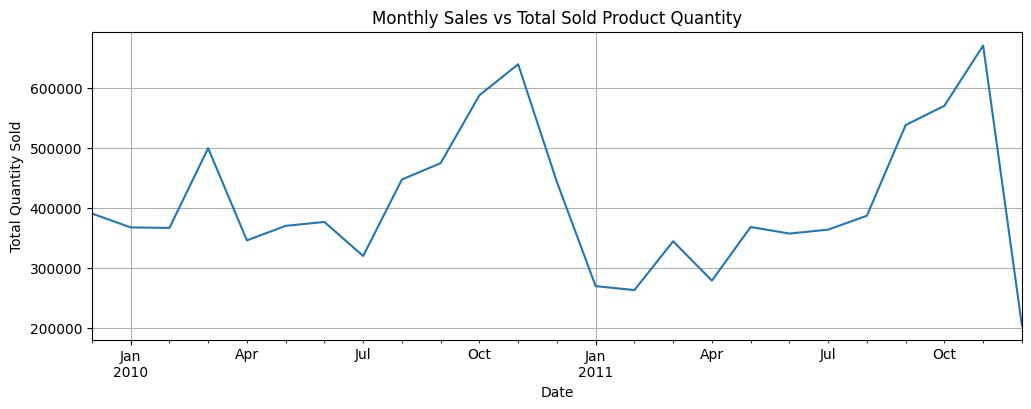

In [ ]:
# to understand the data we can start to visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize total product by month by month
plt.figure(figsize=(12, 4))
df.set_index('InvoiceDate').resample('M').sum()['Quantity'].plot()
plt.title('Monthly Sales vs Total Sold Product Quantity')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

* Insights:
 * Overall, the first year's graph looks like the second year's.
 * falan

### Customer Focused Analysis


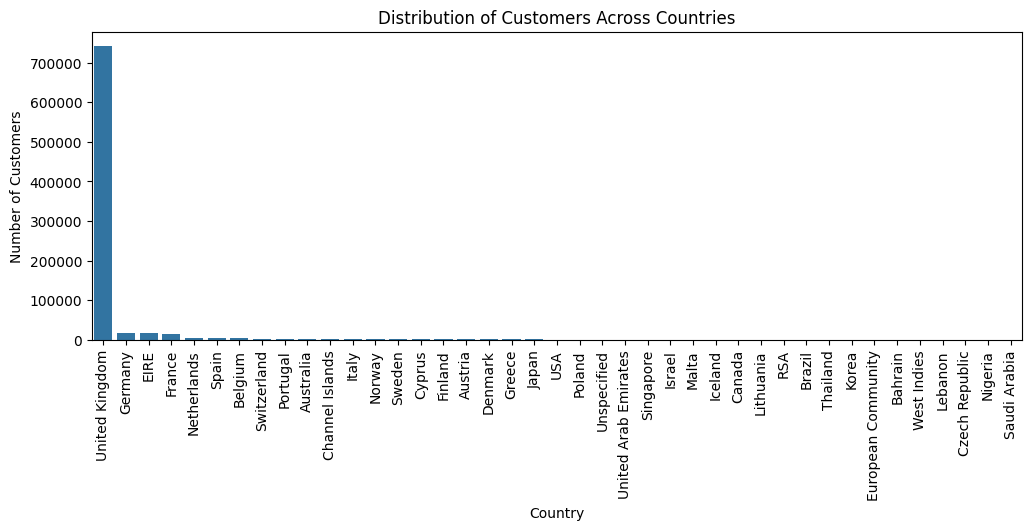

In [ ]:
# Visualize the distribution of customers across countries
plt.figure(figsize=(12, 4))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Customers Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

### Product focused analysis

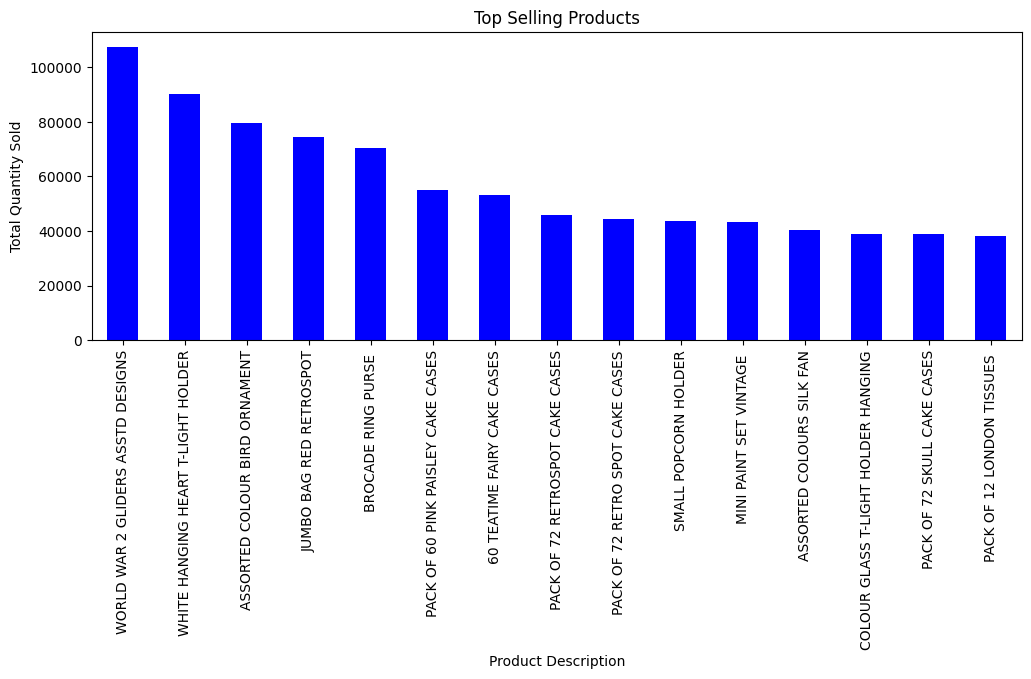

In [ ]:

# Identify top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

# Visualize top-selling products
plt.figure(figsize=(12, 4))
top_products.plot(kind='bar', color='blue')
plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()

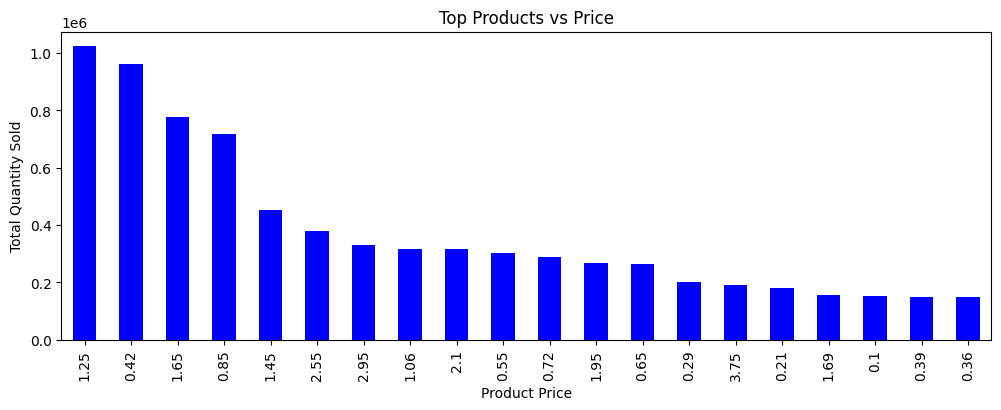

In [ ]:

# Identify top-selling products
price_dist = df.groupby('Price')['Quantity'].sum().sort_values(ascending=False).head(20)

# Visualize top-selling products
plt.figure(figsize=(12, 4))
price_dist.plot(kind='bar', color='blue')
plt.title('Top Products vs Price')
plt.xlabel('Product Price')
plt.ylabel('Total Quantity Sold')
plt.show()

# Customer Segmentation (RFM Analysis)

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
today = df['InvoiceDate'].max() + pd.Timedelta(days = 3)

In [ ]:
print(today," :::::> ",type(today))

2011-12-12 12:50:00  :::::>  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# a new dataframe for RFM Calculations
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': 'max',
    'Invoice': 'nunique',
    'Price': 'sum'
})

In [ ]:
rfm

,InvoiceDate,Invoice,Price
Customer ID,,,
12346.0,2011-01-18 10:17:00,17,580.44
12347.0,2011-12-07 15:52:00,8,644.16
12348.0,2011-09-25 13:13:00,5,193.10
12349.0,2011-11-21 09:51:00,5,1504.59
12350.0,2011-02-02 16:01:00,1,65.30
...,...,...,...
18283.0,2011-12-06 12:02:00,22,1719.75
18284.0,2010-10-06 12:31:00,2,116.09
18285.0,2010-02-17 10:24:00,1,100.20


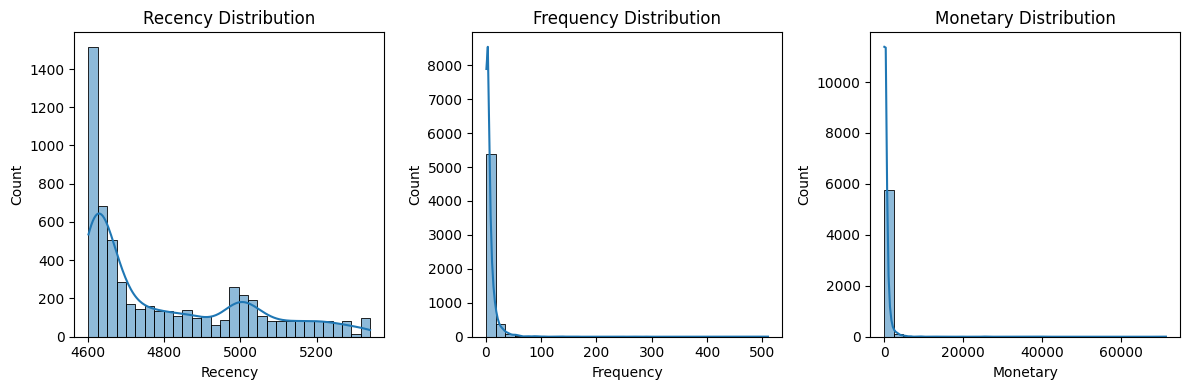

In [ ]:
# Calculate Recency, Frequency, and Monetary values
today = pd.to_datetime('today')
rfm['Recency'] = (today - rfm['InvoiceDate']).dt.days
rfm.rename(columns={'Invoice': 'Frequency', 'Price': 'Monetary'}, inplace=True)

# Visualize RFM values
## Recency Distribution
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')

## Frequency Distribution
plt.subplot(132)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')

## Monetary Distribution
plt.subplot(133)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

* Recency Distribution:
  * Most of the purchases have been done  

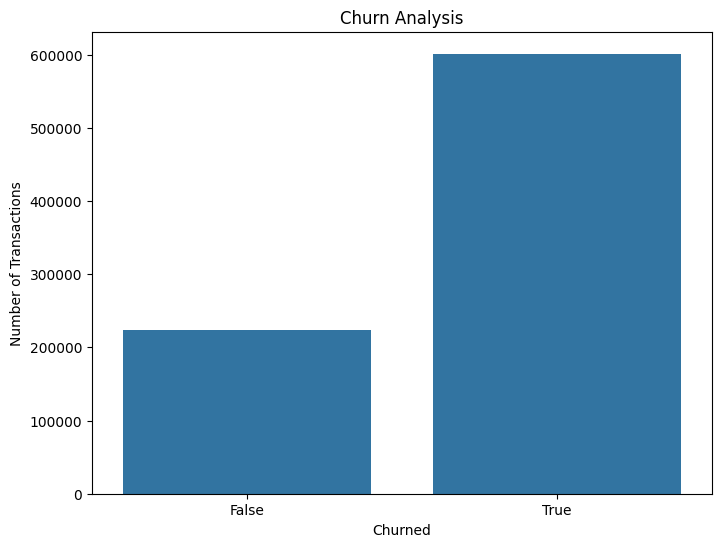

In [ ]:
# Identify and visualize churned customers
churned_customers = df[df['Invoice'].str.startswith('C')]['Customer ID'].unique()
df['Churned'] = df['Customer ID'].isin(churned_customers)

plt.figure(figsize=(8, 6))
sns.countplot(x='Churned', data=df)
plt.title('Churn Analysis')
plt.xlabel('Churned')
plt.ylabel('Number of Transactions')
plt.show()

* Churn

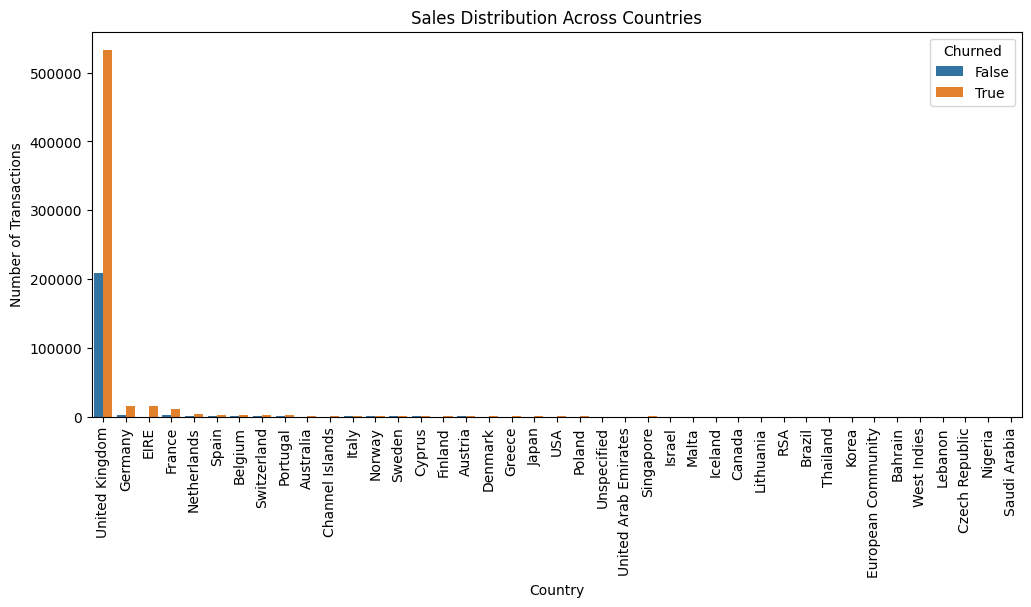

In [ ]:
# Visualize sales distribution across countries
plt.figure(figsize=(12, 5))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, hue='Churned')
plt.title('Sales Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Churned', loc='upper right')
plt.show()

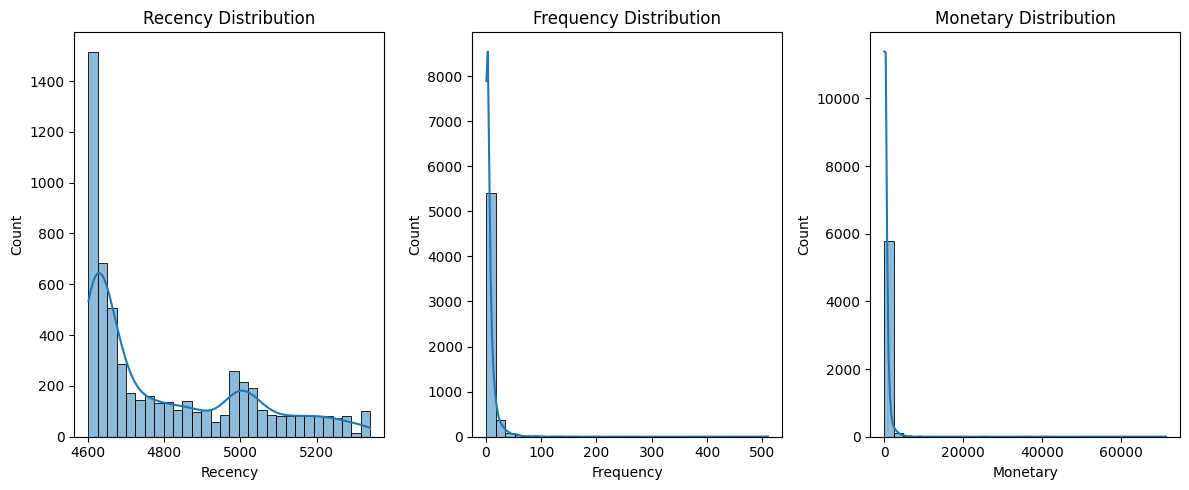

In [ ]:
# Visualize RFM values
plt.figure(figsize=(12, 5))
plt.subplot(131)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')

plt.subplot(132)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')

plt.subplot(133)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

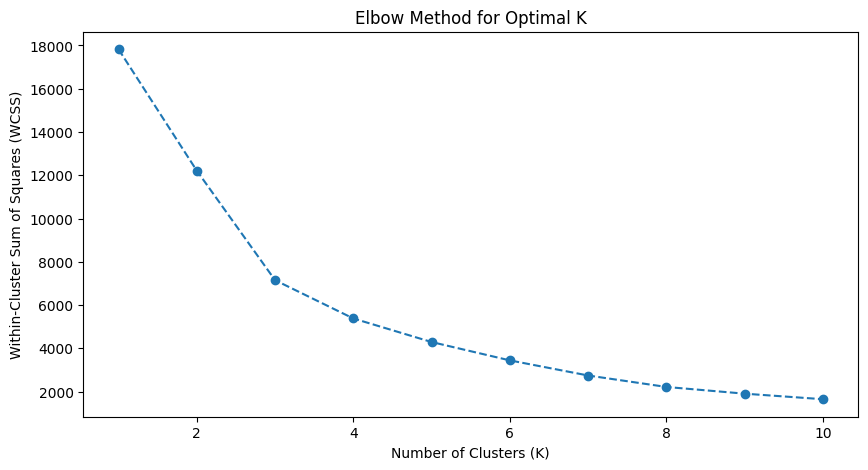

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract RFM values for clustering
rfm_values = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_values)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
# Visualize the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
# cluster = 5
# 0-100, 0-20, 20-40, 40-60, 60-80, 80-100 percentiles
rfm_seg = rfm.copy()
rfm_seg["frequency_score"] = pd.qcut(rfm_seg['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_seg["recency_score"] = pd.qcut(rfm_seg['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_seg["monetary_score"] = pd.qcut(rfm_seg['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_seg["RFM_SCORE"] = (rfm_seg['recency_score'].astype(str) +
                    rfm_seg['frequency_score'].astype(str))
# RFM's segment names;

seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm_seg['segment'] = rfm_seg['RFM_SCORE'].replace(seg_map, regex=True)
rfm_seg.head(10)

,InvoiceDate,Frequency,Monetary,Recency,frequency_score,recency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,,
12346.0,2011-01-18 10:17:00,17,580.44,4927,5,2,4,25,cant_loose
12347.0,2011-12-07 15:52:00,8,644.16,4603,4,5,5,54,champions
12348.0,2011-09-25 13:13:00,5,193.10,4677,3,3,3,33,need_attention
12349.0,2011-11-21 09:51:00,5,1504.59,4620,3,5,5,53,potential_loyalists
12350.0,2011-02-02 16:01:00,1,65.30,4911,1,2,2,21,hibernating
12351.0,2010-11-29 15:23:00,1,49.46,4976,1,2,1,21,hibernating
12352.0,2011-11-03 14:37:00,13,2265.70,4637,5,4,5,45,loyal_customers
12353.0,2011-05-19 17:47:00,2,63.08,4805,2,2,2,22,hibernating
12354.0,2011-04-21 13:11:00,1,261.22,4834,1,2,4,21,hibernating


In [ ]:
rfm_seg[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                            mean count       mean count         mean count
segment                                                                   
about_to_sleep       4708.747396   384   1.458333   384    94.862948   384
at_Risk              4977.149867   754   4.668435   754   391.867347   754
cant_loose           4921.325581    86  17.627907    86  1388.821884    86
champions            4609.228273   863  23.432213   863  1464.050759   863
hibernating          5066.801303  1535   1.336808  1535   122.959161  1535
loyal_customers      4668.943958  1142  11.948336  1142   785.274996  1142
need_attention       4713.420290   276   3.673913   276   223.599641   276
new_customers        4611.618182    55   1.000000    55    66.120000    55
potential_loyalists  4625.990476   735   2.965986   735   215.666408   735
promising            4639.008929   112   1.000000   112    60.893750   112

## CLV ( Customer Lifetime Value)


![source:innertrend.com](https://innertrends.com/wp-content/uploads/2022/07/CLV.png)
* *source: innertrend.com*

In [ ]:
# Step 2: Calculate ARPU (Average Revenue per User)
total_revenue = df['Price'].sum()
num_customers = df['Customer ID'].nunique()
arpu = total_revenue / num_customers

# Step 3: Calculate Average Customer Lifespan (Assuming Churn Rate is available)
churn_rate = 0.25
average_customer_lifespan = 1 / (1 - churn_rate)

# Step 4: Calculate CLV for each customer based on a linear combination of RFM values
rfm['CLV'] = 0.1 * rfm['Recency'] + 0.3 * rfm['Frequency'] + 0.6 * rfm['Monetary']

# Normalize CLV
rfm['CLV'] = (rfm['CLV'] - rfm['CLV'].min()) / (rfm['CLV'].max() - rfm['CLV'].min())

# Display the results
print("ARPU (Average Revenue per User):", arpu)
print("Average Customer Lifespan:", average_customer_lifespan)

# Calculate CLV (Customer Lifetime Value)
rfm['CLV'] = arpu * (1 / (1 - churn_rate))
clv = rfm['CLV']  # Assuming this is the CLV you want to print
print("CLV (Customer Lifetime Value):", clv)

# Step 5: Identify High-Value Customers
high_value_threshold = rfm['CLV'].quantile(0.8)
high_value_customers = rfm[rfm['CLV'] >= high_value_threshold].reset_index()

# Display high-value customers
print("\nHigh-Value Customers:")
print(high_value_customers[['Customer ID', 'CLV']])

ARPU (Average Revenue per User): 510.1011794008753
Average Customer Lifespan: 1.3333333333333333
CLV (Customer Lifetime Value): Customer ID
12346.0    680.134906
12347.0    680.134906
12348.0    680.134906
12349.0    680.134906
12350.0    680.134906
              ...    
18283.0    680.134906
18284.0    680.134906
18285.0    680.134906
18286.0    680.134906
18287.0    680.134906
Name: CLV, Length: 5942, dtype: float64

High-Value Customers:
      Customer ID         CLV
0         12346.0  680.134906
1         12347.0  680.134906
2         12348.0  680.134906
3         12349.0  680.134906
4         12350.0  680.134906
...           ...         ...
5937      18283.0  680.134906
5938      18284.0  680.134906
5939      18285.0  680.134906
5940      18286.0  680.134906
5941      18287.0  680.134906

[5942 rows x 2 columns]


In [ ]:
%%capture
! pip install lifetimes

In [ ]:
from lifetimes.utils import summary_data_from_transaction_data

summary_df = summary_data_from_transaction_data(df, 'Customer ID', 'InvoiceDate', monetary_value_col='Price')
summary_df

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.0,10.0,400.0,725.0,56.694000
12347.0,7.0,402.0,404.0,81.542857
12348.0,4.0,363.0,438.0,44.677500
12349.0,4.0,717.0,735.0,370.110000
12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...
18283.0,18.0,655.0,658.0,90.841667
18284.0,1.0,2.0,431.0,25.000000
18285.0,0.0,0.0,660.0,0.000000


In [ ]:
from lifetimes import BetaGeoFitter

# Fit BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.0)  # Adjust the penalizer_coef if needed
bgf.fit(summary_df['frequency'], summary_df['recency'], summary_df['T'])

# Display the estimated parameters
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>


In [ ]:
# Predict future transactions for the next time period (let's say 1 day)
summary_df['predicted_purchases'] = bgf.predict(1, summary_df['frequency'], summary_df['recency'], summary_df['T'])

* Who are the top 10 customers we expect to make the most purchases within the next month?


In [ ]:
bgf.predict(4,
            summary_df['frequency'],
            summary_df['recency'],
            summary_df['T']).sort_values(ascending=False).head(10)

Customer ID
14911.0    1.443531
12748.0    1.052034
15311.0    1.022657
17841.0    0.983102
14606.0    0.923316
13089.0    0.820339
14156.0    0.745370
14527.0    0.688303
16422.0    0.592567
13798.0    0.519709
dtype: float64

In [ ]:
summary_df["expected_purc_1_month"] = bgf.predict(4,
                                               summary_df['frequency'],
                                               summary_df['recency'],
                                               summary_df['T'])
summary_df.head(10)

,frequency,recency,T,monetary_value,predicted_purchases,expected_purc_1_month
Customer ID,,,,,,
12346.0,10.0,400.0,725.0,56.694000,0.002585,0.010339
12347.0,7.0,402.0,404.0,81.542857,0.016582,0.066299
12348.0,4.0,363.0,438.0,44.677500,0.009007,0.036014
12349.0,4.0,717.0,735.0,370.110000,0.005764,0.023050
12350.0,0.0,0.0,310.0,0.000000,0.001856,0.007421
12351.0,0.0,0.0,375.0,0.000000,0.001572,0.006286
12352.0,8.0,356.0,392.0,281.656250,0.018978,0.075876
12353.0,1.0,204.0,408.0,24.300000,0.003076,0.012299
12354.0,0.0,0.0,232.0,0.000000,0.002369,0.009472


In [ ]:
summary_df["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               summary_df['frequency'],
                                               summary_df['recency'],
                                               summary_df['T'])

In [ ]:
# Check for non-positive values in the monetary_value column
non_positive_monetary_values = summary_df[summary_df['monetary_value'] <= 0]

# Display rows with non-positive monetary values
print("Rows with non-positive monetary values:")
print(non_positive_monetary_values)

# Handle non-positive values (replace or remove them)
# For example, you can replace non-positive values with NaN and then drop them
summary_df['monetary_value'] = summary_df['monetary_value'].replace({0: np.nan})
summary_df = summary_df.dropna(subset=['monetary_value'])

Rows with non-positive monetary values:
             frequency  recency      T  monetary_value  predicted_purchases  \
Customer ID                                                                   
12350.0            0.0      0.0  310.0             0.0             0.001856   
12351.0            0.0      0.0  375.0             0.0             0.001572   
12354.0            0.0      0.0  232.0             0.0             0.002369   
12365.0            0.0      0.0  291.0             0.0             0.001959   
12366.0            0.0      0.0  633.0             0.0             0.000978   
...                ...      ...    ...             ...                  ...   
18254.0            0.0      0.0  581.0             0.0             0.001059   
18264.0            0.0      0.0  498.0             0.0             0.001219   
18266.0            0.0      0.0  434.0             0.0             0.001381   
18279.0            0.0      0.0  519.0             0.0             0.001174   
18285.0     

In [ ]:
# Replace non-positive values with NaN
summary_df['monetary_value'] = summary_df['monetary_value'].replace({0: np.nan})

# Drop rows with NaN in the monetary_value column
summary_df = summary_df.dropna(subset=['monetary_value'])

# Verify the changes
print(summary_df.head())


             frequency  recency      T  monetary_value  predicted_purchases  \
Customer ID                                                                   
12346.0           10.0    400.0  725.0       56.694000             0.002585   
12347.0            7.0    402.0  404.0       81.542857             0.016582   
12348.0            4.0    363.0  438.0       44.677500             0.009007   
12349.0            4.0    717.0  735.0      370.110000             0.005764   
12352.0            8.0    356.0  392.0      281.656250             0.018978   

             expected_purc_1_month  expected_purc_3_month  
Customer ID                                                
12346.0                   0.010339               0.030994  
12347.0                   0.066299               0.198661  
12348.0                   0.036014               0.107926  
12349.0                   0.023050               0.069103  
12352.0                   0.075876               0.227349  


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Churned'],
      dtype='object')

## Predictive Modeling for Churn

In [ ]:
# Create additional features in df
df['AvgPurchaseValue'] = df['Price']  # Use 'Price' as a proxy for average purchase value
df['TotalQuantityPurchased'] = df['Quantity']
df['TotalNumInvoices'] = 1  # Each row represents one invoice

# Aggregate features at the customer level
additional_features = df.groupby('Customer ID').agg({
    'AvgPurchaseValue': 'mean',
    'TotalQuantityPurchased': 'sum',
    'TotalNumInvoices': 'sum'
}).reset_index()

# Merge RFM features with additional features
merged_df = pd.merge(rfm, additional_features, on='Customer ID', how='left')

# Fill missing values with zeros
merged_df.fillna(0, inplace=True)

# Create the target variable 'Churned'
df['Churned'] = df['Churned'].fillna(0)

# Display the updated DataFrame
print(merged_df.head())

   Customer ID         InvoiceDate  Frequency  Monetary  Recency         CLV  \
0      12346.0 2011-01-18 10:17:00         17    580.44     4927  680.134906   
1      12347.0 2011-12-07 15:52:00          8    644.16     4603  680.134906   
2      12348.0 2011-09-25 13:13:00          5    193.10     4677  680.134906   
3      12349.0 2011-11-21 09:51:00          5   1504.59     4620  680.134906   
4      12350.0 2011-02-02 16:01:00          1     65.30     4911  680.134906   

   AvgPurchaseValue  TotalQuantityPurchased  TotalNumInvoices  
0         12.092500                      52                48  
1          2.546087                    3286               253  
2          3.786275                    2714                51  
3          8.358833                    1619               180  
4          3.841176                     197                17  


In [ ]:
%%capture
! pip install mlflow


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

df['Churned'] = df['Churned'].fillna(0)

# Create additional features in df
df['AvgPurchaseValue'] = df['Price']  # Use 'Price' as a proxy for average purchase value
df['TotalQuantityPurchased'] = df['Quantity']
df['TotalNumInvoices'] = 1  # Each row represents one invoice

# Aggregate features at the customer level
additional_features = df.groupby('Customer ID').agg({
    'AvgPurchaseValue': 'mean',
    'TotalQuantityPurchased': 'sum',
    'TotalNumInvoices': 'sum',
    'Churned': 'max'  # Use max to capture any instance of churn within the customer's history
}).reset_index()

# Merge RFM features with additional features
merged_df = pd.merge(rfm, additional_features, on='Customer ID', how='left')

# Fill missing values with zeros
merged_df.fillna(0, inplace=True)

# Define features (X) and target variable (y)
X = merged_df.drop(['Customer ID', 'InvoiceDate', 'Churned'], axis=1)
y = merged_df['Churned']

In [ ]:
merged_df.head(10)

,Customer ID,InvoiceDate,Frequency,Monetary,Recency,CLV,AvgPurchaseValue,TotalQuantityPurchased,TotalNumInvoices,Churned
0,12346.0,2011-01-18 10:17:00,17,580.44,4927,680.134906,12.092500,52,48,True
1,12347.0,2011-12-07 15:52:00,8,644.16,4603,680.134906,2.546087,3286,253,False
2,12348.0,2011-09-25 13:13:00,5,193.10,4677,680.134906,3.786275,2714,51,False
3,12349.0,2011-11-21 09:51:00,5,1504.59,4620,680.134906,8.358833,1619,180,True
4,12350.0,2011-02-02 16:01:00,1,65.30,4911,680.134906,3.841176,197,17,False
5,12351.0,2010-11-29 15:23:00,1,49.46,4976,680.134906,2.355238,261,21,False
6,12352.0,2011-11-03 14:37:00,13,2265.70,4637,680.134906,20.050442,658,113,True
7,12353.0,2011-05-19 17:47:00,2,63.08,4805,680.134906,2.628333,212,24,False
8,12354.0,2011-04-21 13:11:00,1,261.22,4834,680.134906,4.503793,530,58,False
9,12355.0,2011-05-09 13:49:00,2,107.43,4815,680.134906,3.069429,543,35,False


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Predicted results for RandomForest:
[False  True False ... False  True False]


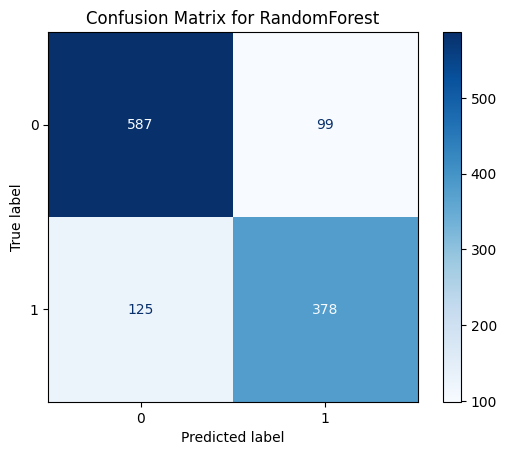

Predicted results for GradientBoosting:
[False  True False ... False  True False]


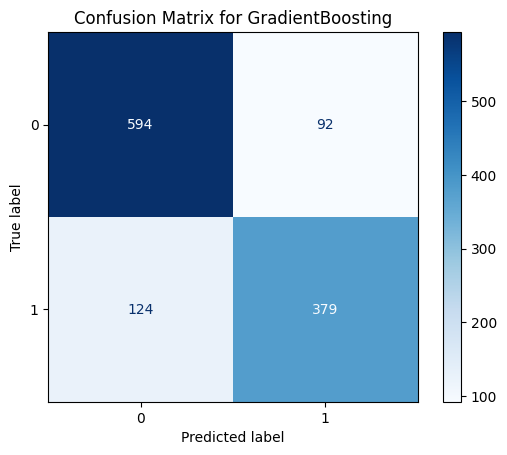

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_log_model(model, model_name):
    with mlflow.start_run():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Log parameters and metrics to MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Log the model
        mlflow.sklearn.log_model(model, model_name)

        # Print predicted results
        print(f"Predicted results for {model_name}:")
        print(y_pred)

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

        return {
            "model_name": model_name,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1
        }

# Define your models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train and log the models
rf_metrics = train_and_log_model(rf_model, "RandomForest")
gb_metrics = train_and_log_model(gb_model, "GradientBoosting")


In [ ]:
# Print the results
print("Random Forest Metrics:", rf_metrics)
print("Gradient Boosting Metrics:", gb_metrics)


Random Forest Metrics: {'model_name': 'RandomForest', 'accuracy': 0.8116063919259883, 'precision': 0.8109069641097382, 'recall': 0.8116063919259883, 'f1_score': 0.8108591649353353}
Gradient Boosting Metrics: {'model_name': 'GradientBoosting', 'accuracy': 0.8183347350714887, 'precision': 0.8177257624978812, 'recall': 0.8183347350714887, 'f1_score': 0.8174207601693989}


In [ ]:
gb_metrics

{'model_name': 'GradientBoosting',
 'accuracy': 0.8183347350714887,
 'precision': 0.8177257624978812,
 'recall': 0.8183347350714887,
 'f1_score': 0.8174207601693989}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = merged_df[['Frequency', 'Recency', 'CLV', 'AvgPurchaseValue', 'TotalQuantityPurchased', 'TotalNumInvoices']]
y = merged_df['Monetary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hyperparameter tuning (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model
best_y_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_y_pred)
print(f'Best Model Mean Squared Error: {best_mse}')

Mean Squared Error: 159738.91991988823
Best Model Mean Squared Error: 159738.91991988823


In [ ]:
with mlflow.start_run():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mlflow.log_metric('mse', mse)
    mlflow.sklearn.log_model(model, 'model')

In [ ]:
best_y_pred

array([100.6564,  31.0214,  31.3428, ..., 378.3695, 564.0706, 275.1242])

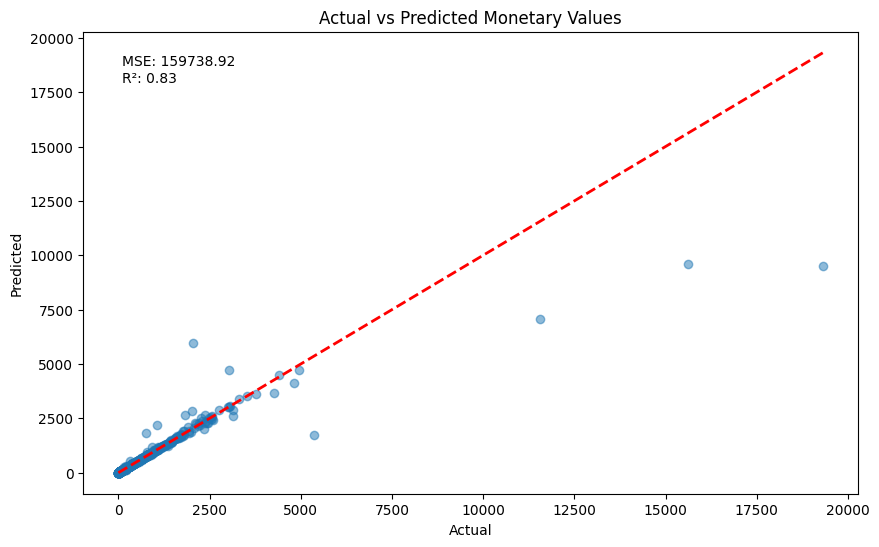

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, best_y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Monetary Values')
plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nR²: {r2:.2f}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.5, color='white'))
plt.show()

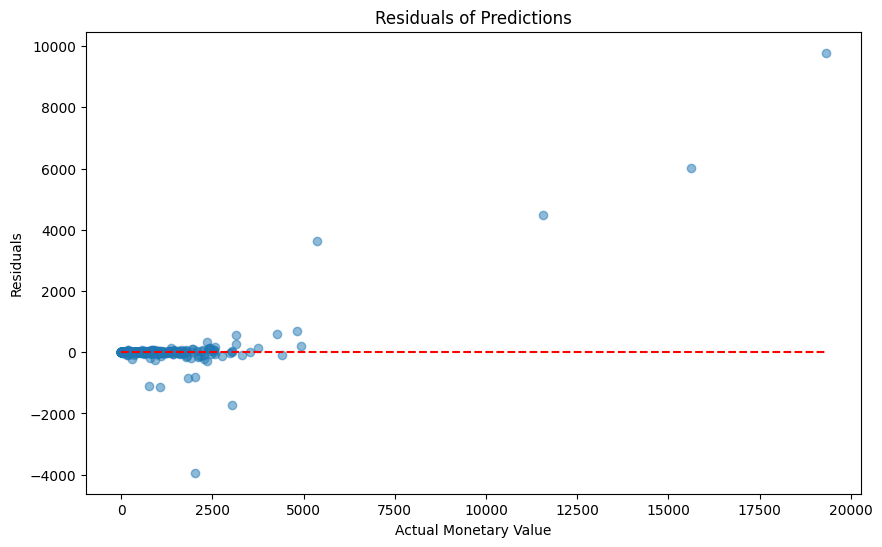

In [ ]:
# Calculate residuals
residuals = y_test - best_y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), linestyles='dashed', colors='r')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()


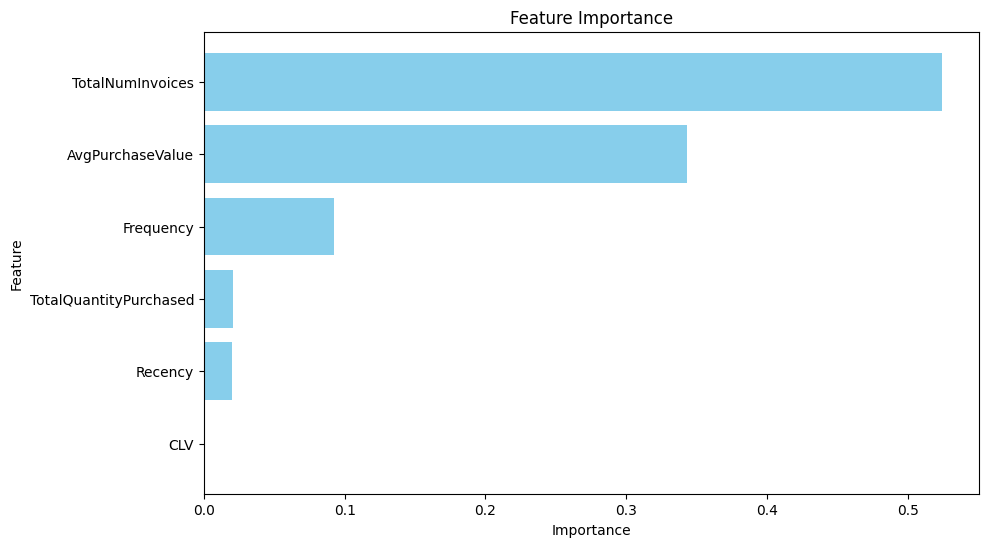

In [ ]:
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
